# Домашнее задание 2 - предобработка признаков, pandas


### О задании

Практическое задание 2 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы, которые позднее будут учитываться при проставлении оценок автоматом по курсу.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания получившийся файл \*.ipynb с решением необходимо выложить в свой репозиторий github.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [1]:
import numpy as np
import pandas as pd
import matplotlib

In [2]:
%matplotlib inline
import math
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer

**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [3]:
def max_element(arr):
    modified = np.nonzero(a == 0)[0]
    if not len(modified):
        return None
    modified += 1
    if modified[-1] == len(arr):
        modified = modified[:-1]
    return np.amax(arr[modified])

In [4]:
for i in range(1, 6, 2):
    print(i)


1
3
5


**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [5]:
def nearest_value(X, v):
    Y = X - v
    coordinate = np.argmin(np.absolute(Y))
    return X.flatten()[coordinate]

In [6]:
X = np.arange(-10,0).reshape((2, 5))
v = -2.51
print(nearest_value(X, v))

-3


**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [7]:
def scale(X):
    stds = X.std(axis=1)
    if len(np.nonzero(stds==0)[0]):
        return "DIVISION BY ZERO!!!"
    means = X.mean(axis=1)
    Y = X - means
    Y /= stds
    return Y

sample_matrix = np.array([np.random.randint(0, 100, 2) for i in range(2)])

print(sample_matrix)
print(scale(sample_matrix))

[[ 5 62]
 [35 47]]
[[-1.          3.5       ]
 [ 0.05263158  1.        ]]


**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [8]:
def get_stats(X):
    print("DET: ", np.linalg.det(X))
    print("TRACE: ", np.trace(X))
    print("MAX: ", X.max())
    print("MIN: ", X.min())
    print("MATRIX NORM: ", np.linalg.norm(X))
    print("EIGENVALS: ", np.linalg.eig(X)[0])
    print("INVERSE: ", np.linalg.inv(X))
    # Your code here
    
X = np.array([np.random.normal(10, 1, 2) for i in range(2)])
print(X)
get_stats(X)

[[10.34626959  8.96648535]
 [ 8.63008948 10.76094732]]
DET:  33.9540912085276
TRACE:  21.10721691606708
MAX:  10.760947321777628
MIN:  8.63008947574549
MATRIX NORM:  19.435009279919452
EIGENVALS:  [ 1.75448576 19.35273116]
INVERSE:  [[ 0.31692638 -0.26407673]
 [-0.25416936  0.30471349]]


**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [9]:
max_vals = np.array([])
for exp_num in range(100):
    X = np.array([np.random.normal(0, 1, 10) for i in range(10)])
    Y = np.array([np.random.normal(0, 1, 10) for i in range(10)])
    max_vals = np.append(max_vals, [np.dot(X, Y).max()])

print("MEAN: ", max_vals.mean())
print("95% quantile: ", np.percentile(max_vals, 95))
    

MEAN:  8.573435562808339
95% quantile:  12.487427337067274


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

Данные находятся в приложенном файле `2008.csv`. Их [описание](http://stat-computing.org/dataexpo/2009/the-data.html) приведено ниже:

Airline on-time performance

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The data
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

Understanding and preparing the data
In order to answer above questions, we are going to analyze the provided dataset, containing up to 1936758 ### different internal flights in the US for 2008 and their causes for delay, diversion and cancellation

The data comes from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS). Meta data explanations

This dataset is composed by the following variables:

**Year** 2008 **Month** 1-12 **DayofMonth** 1-31 **DayOfWeek** 1 (Monday) - 7 (Sunday)  
**DepTime** actual departure time (local, hhmm)  
**CRSDepTime** scheduled departure time (local, hhmm)  
**ArrTime** actual arrival time (local, hhmm)  
**CRSArrTime** scheduled arrival time (local, hhmm)  
**UniqueCarrier** unique carrier code  
**FlightNum** flight number  
**TailNum** plane tail number: aircraft registration, unique aircraft identifier  
**ActualElapsedTime** in minutes  
**CRSElapsedTime** in minutes  
**AirTime** in minutes  
**ArrDelay** arrival delay, in minutes: A flight is counted as “on time” if it operated less than 15 minutes later the scheduled time shown in the carriers’ Computerized Reservations Systems (CRS).  
**DepDelay** departure delay, in minutes  
**Origin** origin IATA airport code  
**Dest** destination IATA airport code  
**Distance** in miles  
**TaxiIn** taxi in time, in minutes  
**TaxiOut** taxi out time in minutes  
**Cancelled** *was the flight cancelled  
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)  
**Diverted** 1 = yes, 0 = no  
**CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.  
**WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.  
**NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.  
**SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.  
**LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [46]:
import pandas as pd
import numpy as np

**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [100]:
datas = pd.read_csv('2008.csv')

In [101]:
reason = datas.groupby("CancellationCode")
reason.sum()["Cancelled"]

CancellationCode
A    563
B    549
C    299
Name: Cancelled, dtype: int64

**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [102]:
print("MAX = ", datas["Distance"].max())
print("MIN = ", datas["Distance"].min())
print("MEAN = ", datas["Distance"].mean())

MAX =  4962
MIN =  31
MEAN =  724.5082571428571


**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [103]:
susp_flight_info = datas[datas.Distance == 31][["FlightNum", "Month", "DayofMonth"]]
susp_flight_nums = susp_flight_info["FlightNum"].unique()
print("Подозрительные:")
print(susp_flight_info, "\n")
print("Они же в другие дни:")
for flight in susp_flight_nums:
        print("FLIGHT # ", flight, "\n", datas[(datas['FlightNum'] == susp_flight_nums[1]) &
                                                                   (datas['Distance'] != 31)][['Distance', 'Month', 'DayofMonth']], "\n")

Подозрительные:
       FlightNum  Month  DayofMonth
1116          65     12          30
6958          65     12          26
17349         64      8          18
27534         64      3          11
46082         65      8           9
48112         64      2          28 

Они же в другие дни:
FLIGHT #  65 
        Distance  Month  DayofMonth
501         533      3          20
1389        680      3          13
2619       2381      5          23
3869         82      7           1
4025       1005      6          15
4466        123      6          29
6778        359      7          12
7891       2381      4           6
7977       1747      7           9
8448        123      2          10
9615        533      1           4
10833       372      3          31
12352      1747      1          14
12980        82      8           6
13155      1747      7           2
21304      1005      5          13
24750       680      8          21
25671       533      1          15
26323      1005     12       

**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [104]:
most_departures_airport = datas['Origin'].value_counts().idxmax()

print(f"Аэропорт с наибольшим количеством вылетов: {most_departures_airport}")

Аэропорт с наибольшим количеством вылетов: ATL


ATL находится в городе  'Atlanta'

**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [105]:
time_mean = datas.groupby('Origin')['AirTime'].mean().reset_index()
time_max = time_mean.loc[time_mean['AirTime'].idxmax()]
print("Аэропорт с наибольшим средним AirTime:")
print(time_max['Origin'])

Аэропорт с наибольшим средним AirTime:
SJU


**11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [106]:
all_airports = datas[datas['Cancelled'] != 1][['Origin', 'DepDelay']].groupby('Origin').filter(lambda x: len(x) > 1000)
delays_in_airports = all_airports[all_airports['DepDelay'] > 0].groupby('Origin')
print(delays_in_airports.size())
dell_aip = np.array(delays_in_airports.size())
all_aip = np.array(all_airports.groupby('Origin').size())
id_max_in_parts = (dell_aip / all_aip).argmax()
print(all_airports.groupby('Origin').size(), "\nэто аэропорт #", id_max_in_parts + 1)


Origin
ATL    1738
BOS     376
BWI     467
CLT     498
DEN    1063
DFW    1283
DTW     569
EWR     710
IAH     841
JFK     444
LAS     779
LAX     859
LGA     358
MCO     537
MSP     459
ORD    1649
PHL     432
PHX     858
SEA     495
SFO     557
SLC     424
dtype: int64
Origin
ATL    4078
BOS    1128
BWI    1018
CLT    1229
DEN    2353
DFW    2730
DTW    1588
EWR    1343
IAH    1770
JFK    1172
LAS    1773
LAX    2063
LGA    1114
MCO    1324
MSP    1233
ORD    3391
PHL    1007
PHX    2010
SEA    1114
SFO    1371
SLC    1313
dtype: int64 
это аэропорт # 8


EWR

## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [107]:
#datas = pd.read_csv('2008.csv')
print("Пропущенные значения имеются:", datas.isnull().values.any())
print("В таблице объект-признак пропущено", datas.isnull().values.sum(), "значений")
print(np.count_nonzero(np.array(datas.isnull().values.sum(axis=1))), "объектов имеют хотя бы 1 пропуск")
print(np.count_nonzero(np.array(datas.isnull().values.sum(axis=0))), "признаков имеют хотя бы 1 пропуск")


Пропущенные значения имеются: True
В таблице объект-признак пропущено 355215 значений
70000 объектов имеют хотя бы 1 пропуск
16 признаков имеют хотя бы 1 пропуск


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной? ДА, имеются пропущенные значения в целевой переменной.
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [108]:
# datas = datas[(~datas['DepDelay'].isnull())]
# datas = datas[(datas['DepDelay'] != 0)]
# datas = datas.reset_index(drop=True)  # Add drop=True to drop the old index
# datas = datas.drop(['Cancelled', 'CancellationCode'], axis=1)  # Provide column names in a list

In [109]:
# datas = datas.reset_index(drop=True)
###########datas = datas[35000:45000]   
# datas = datas.reset_index()
# datas = datas.drop('index', 1)

In [110]:
# Y = datas['DepDelay']
# datas = datas.drop('DepDelay', axis=1)
# #Y.head()

In [111]:
if datas["DepDelay"].isnull().any():
    print("Есть пропуски в целевой переменной")
else:
    print("Нет пропусков в целевой переменной")
    
temp = datas[datas["DepDelay"].isnull() == True]
pd.unique(temp["Cancelled"])

Есть пропуски в целевой переменной


array([1])

In [112]:
index_list = list(datas[(datas["DepDelay"].isnull() == True) | (datas["DepDelay"] == 0)].index)
data_linreg = datas.drop(index_list, axis = 0)
data_linreg.drop(["CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay", "Cancelled", 
                "CancellationCode", "Year", "TailNum"], axis = 1, inplace = True)
data_depdelay = data_linreg["DepDelay"]
data_linreg.drop("DepDelay", axis = 1, inplace = True)
data_linreg

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Diverted
0,6,18,3,2111.0,2055,2308.0,2300,WN,242,57.0,65.0,46.0,8.0,MDW,CLE,307,3.0,8.0,0
1,6,4,3,1426.0,1410,1730.0,1728,XE,2380,124.0,138.0,108.0,2.0,IAH,AVL,834,4.0,12.0,0
2,8,3,7,1143.0,1145,1501.0,1520,WN,1769,138.0,155.0,125.0,-19.0,MDW,TPA,997,4.0,9.0,0
3,1,23,3,1141.0,1144,1323.0,1335,OO,3802,102.0,111.0,79.0,-12.0,SLC,FCA,532,4.0,19.0,0
4,5,4,7,815.0,820,1243.0,1300,WN,399,148.0,160.0,136.0,-17.0,LAS,AUS,1090,4.0,8.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,1,26,6,920.0,925,1110.0,1118,OH,5218,110.0,113.0,85.0,-8.0,CVG,BDL,661,12.0,13.0,0
69995,5,12,1,1829.0,1840,2137.0,2149,DL,794,128.0,129.0,86.0,-12.0,ORD,ATL,606,22.0,20.0,0
69996,5,11,7,1149.0,1125,1336.0,1314,OO,6159,47.0,49.0,30.0,22.0,ORD,GRR,137,4.0,13.0,0
69998,2,18,1,1906.0,1900,2200.0,2139,NW,641,234.0,219.0,192.0,21.0,RSW,MSP,1416,20.0,22.0,0


**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [113]:
#datas = pd.read_csv("2008.csv")
def ex_13(X):
    list_hh = list()
    list_mm = list()
    for i in X:
        if np.isnan(i):
            list_hh.append(np.nan)
            list_mm.append(np.nan)
        else:
            temp = str(int(i))
            list_hh.append(float(('0'*(4-len(temp)) + temp)[:-2]))
            list_mm.append(float(('0'*(4-len(temp)) + temp)[-2:]))
    return list_hh, list_mm

data_linreg["DepTime_Hour"], data_linreg["DepTime_Minute"] = ex_13(data_linreg["DepTime"])
data_linreg.drop("DepTime", axis = 1, inplace = True)
data_linreg["CRSDepTime_Hour"], data_linreg["CRSDepTime_Minute"] = ex_13(data_linreg["CRSDepTime"])
data_linreg.drop("CRSDepTime", axis = 1, inplace = True)
data_linreg["ArrTime_Hour"], data_linreg["ArrTime_Minute"] = ex_13(data_linreg["ArrTime"])
data_linreg.drop("ArrTime", axis = 1, inplace = True)
data_linreg["CRSArrTime_Hour"], data_linreg["CRSArrTime_Minute"] = ex_13(data_linreg["CRSArrTime"])
data_linreg.drop("CRSArrTime", axis = 1, inplace = True)
data_linreg

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Diverted,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,6,18,3,WN,242,57.0,65.0,46.0,8.0,MDW,CLE,307,3.0,8.0,0,21.0,11.0,20.0,55.0,23.0,8.0,23.0,0.0
1,6,4,3,XE,2380,124.0,138.0,108.0,2.0,IAH,AVL,834,4.0,12.0,0,14.0,26.0,14.0,10.0,17.0,30.0,17.0,28.0
2,8,3,7,WN,1769,138.0,155.0,125.0,-19.0,MDW,TPA,997,4.0,9.0,0,11.0,43.0,11.0,45.0,15.0,1.0,15.0,20.0
3,1,23,3,OO,3802,102.0,111.0,79.0,-12.0,SLC,FCA,532,4.0,19.0,0,11.0,41.0,11.0,44.0,13.0,23.0,13.0,35.0
4,5,4,7,WN,399,148.0,160.0,136.0,-17.0,LAS,AUS,1090,4.0,8.0,0,8.0,15.0,8.0,20.0,12.0,43.0,13.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,1,26,6,OH,5218,110.0,113.0,85.0,-8.0,CVG,BDL,661,12.0,13.0,0,9.0,20.0,9.0,25.0,11.0,10.0,11.0,18.0
69995,5,12,1,DL,794,128.0,129.0,86.0,-12.0,ORD,ATL,606,22.0,20.0,0,18.0,29.0,18.0,40.0,21.0,37.0,21.0,49.0
69996,5,11,7,OO,6159,47.0,49.0,30.0,22.0,ORD,GRR,137,4.0,13.0,0,11.0,49.0,11.0,25.0,13.0,36.0,13.0,14.0
69998,2,18,1,NW,641,234.0,219.0,192.0,21.0,RSW,MSP,1416,20.0,22.0,0,19.0,6.0,19.0,0.0,22.0,0.0,21.0,39.0


**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

Month                False
DayofMonth           False
DayOfWeek            False
FlightNum            False
ActualElapsedTime    False
CRSElapsedTime       False
AirTime              False
ArrDelay             False
Distance             False
TaxiIn               False
TaxiOut              False
Diverted             False
DepTime_Hour         False
DepTime_Minute       False
CRSDepTime_Hour      False
CRSDepTime_Minute    False
ArrTime_Hour         False
ArrTime_Minute       False
CRSArrTime_Hour      False
CRSArrTime_Minute    False
dtype: bool


/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector)

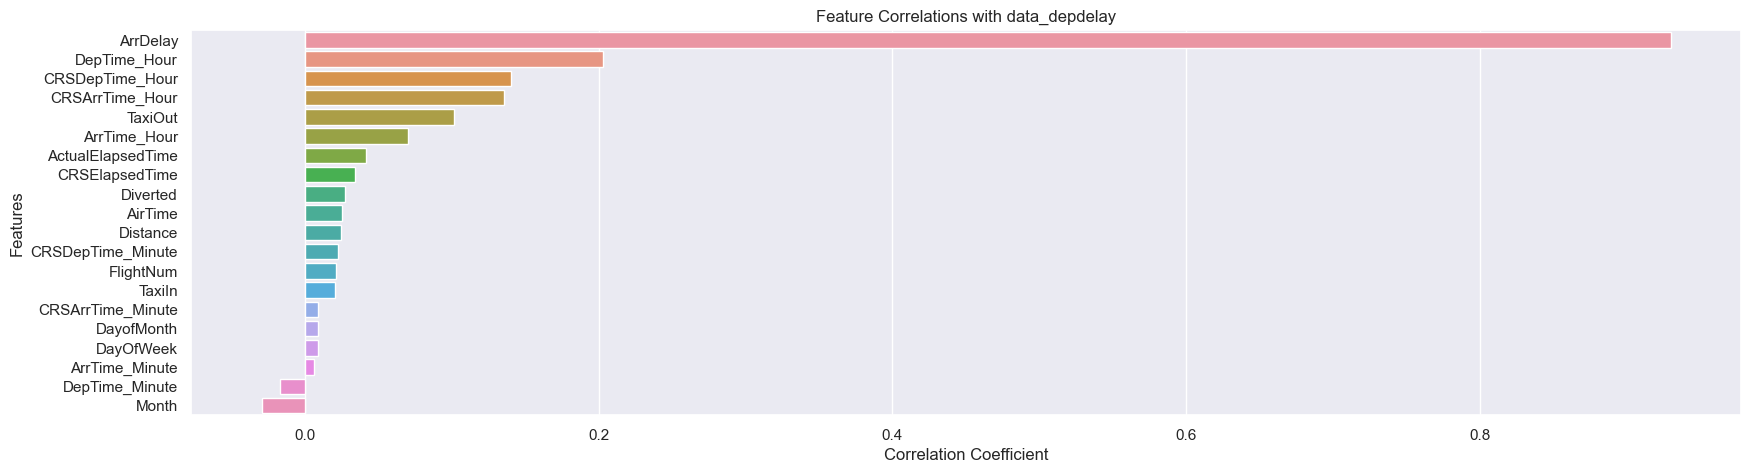

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(style="darkgrid")

# Assuming you have already loaded your data into the `data_linreg` DataFrame
cor_data = data_linreg.copy().select_dtypes([np.number])
features = cor_data.columns

# Fill missing values with the mean of each column
for i in features:
    cor_data[i].fillna(cor_data[i].mean(), inplace=True)

# Check if there are any remaining missing values
print(cor_data.isna().any())

# Calculate correlations between features and the target variable
correlations = {
    feature: np.corrcoef(cor_data[feature], data_depdelay)[0][1]
    for feature in features
}

# Sort the correlations in descending order
sorted_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)
features_order = [x[0] for x in sorted_correlations]
correlations = [x[1] for x in sorted_correlations]

# Create a bar plot to visualize correlations
plt.figure(figsize=(20, 5))
plot = sns.barplot(y=features_order, x=correlations, orient='h')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.title('Feature Correlations with data_depdelay')
plt.show()


**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

<Axes: >

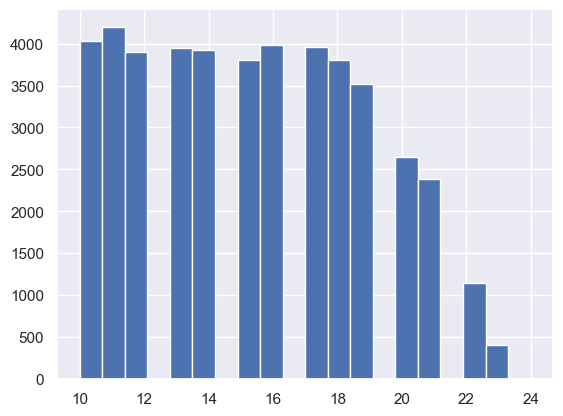

In [115]:
#X = datas.copy()
X['DepTime_Hour'].hist(bins=20)

<Axes: >

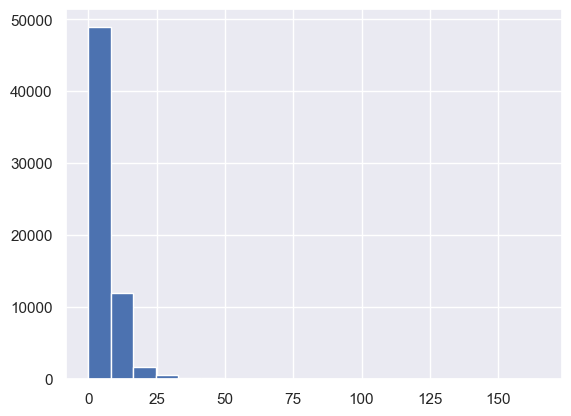

In [116]:
X['TaxiIn'].hist(bins=20)

<Axes: >

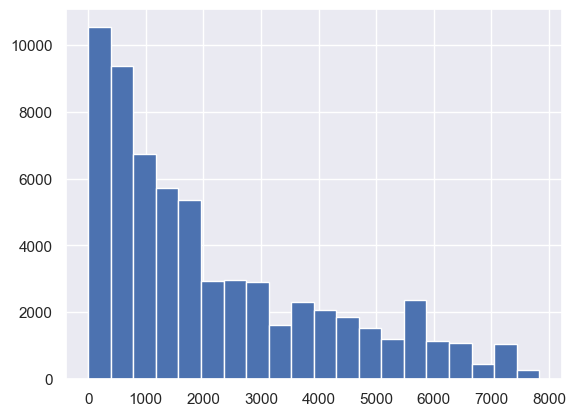

In [117]:
X['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Масштабирование необходимо для избежания больших выходных значений. На трех представленных графиках мы наблюдаем проблему с несогласованностью масштабов (параметров), представленных в таблице. Это означает, что единицы измерения различны, и мы не можем провести сравнительный анализ трех графиков. После масштабирования признаки будут регуляризованы в равной степени.

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [118]:
from sklearn.preprocessing import StandardScaler
def transform_data(data):
    # Your code here
    
    numeric_data = list(data.select_dtypes(np.number).columns)
    data[numeric_data] = data[numeric_data].fillna(0)
    scaler = StandardScaler()
    data[numeric_data] = scaler.fit_transform(data[numeric_data])
    categorical_data = list(data.select_dtypes(object).columns)
    data[categorical_data] = data[categorical_data].fillna('nan')
    temp = pd.get_dummies(data[categorical_data])
    result_data = pd.concat([data, temp], axis = 1).drop(categorical_data, axis = 1)
    return result_data

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [119]:
data = transform_data(data_linreg)
print(data.columns.size)

634


**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_depdelay, test_size = 0.3, random_state=42)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [170]:
# Your code here
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

X_train_train, X_train_test, y_train_train, y_train_test = train_test_split(X_train, y_train, 
                                                                            train_size = 1000, random_state = 42)
reg = LinearRegression().fit(X_train_train, y_train_train)

In [171]:
y_train_train_pred = reg.predict(X_train_train)
print("MSE подвыборки (train):", mean_squared_error(y_train_train, y_train_train_pred))
print("R^2 подвыборки (train):", reg.score(X_train_train, y_train_train))

MSE подвыборки (train): 1.3546570322223074e-26
R^2 подвыборки (train): 1.0


In [172]:
y_test_pred = reg.predict(X_test)
print("MSE контрольной выборки (test):", mean_squared_error(y_test, y_test_pred))
print("R^2 контрольной выборки (test):", reg.score(X_test, y_test))

MSE контрольной выборки (test): 61.25642686399954
R^2 контрольной выборки (test): 0.9542065873265702


Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

In [164]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.model_selection import GridSearchCV, cross_val_predict

__18. (1 балл) __ Обучение линейной регрессии.



Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

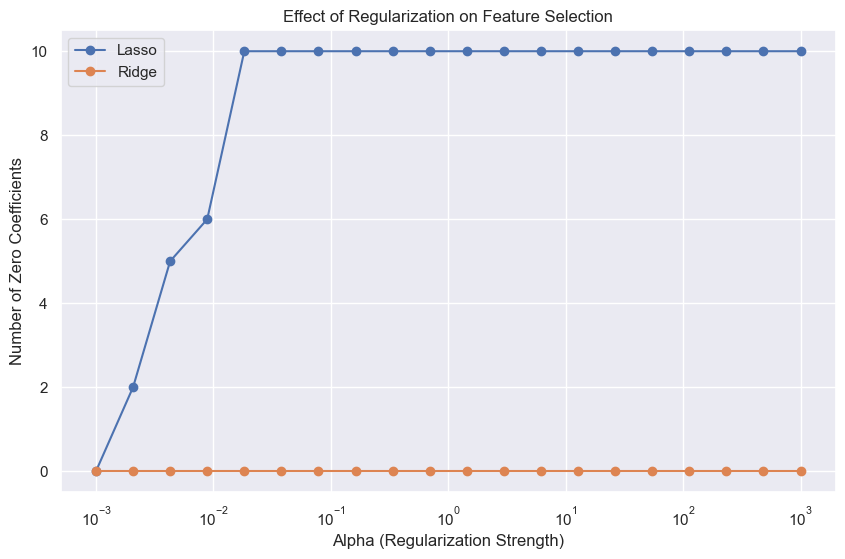

In [181]:
import numpy as np
from sklearn.linear_model import Lasso, Ridge
import matplotlib.pyplot as plt

# Generate sample data (replace with your own data)
np.random.seed(0)
X_train_train = np.random.rand(100, 10)  # Example: 100 samples, 10 features
y_train_train = np.random.rand(100)

# Initialize alpha values
alphas = 10 ** np.linspace(-3, 3, 20)

# Initialize lists to store the count of zero coefficients
l_zeros = []
r_zeros = []

# Fit Lasso and Ridge models for different alpha values
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    ridge = Ridge(alpha=alpha)
    
    lasso.fit(X_train_train, y_train_train)
    ridge.fit(X_train_train, y_train_train)

    lasso_zeros_num = list()
    ridge_zeros_num = list()
    
    # Count the number of zero coefficients for each model
    l_zeros.append(np.sum(np.absolute(lasso.coef_) < 10 ** (-7)))
    r_zeros.append(np.sum(np.absolute(ridge.coef_) < 10 ** (-7)))

# Plot the results
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, l_zeros, label='Lasso', marker='o')
plt.semilogx(alphas, r_zeros, label='Ridge', marker='o')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Number of Zero Coefficients')
plt.title('Effect of Regularization on Feature Selection')
plt.legend()
plt.grid(True)
plt.show()


In [177]:
lasso = Lasso()
lasso = lasso.fit(X_train_train, y_train_train)
ridge = Ridge()
ridge = ridge.fit(X_train_train, y_train_train)

print("0 Lasso:", np.sum(np.absolute(lasso.coef_) < 10 ** (-10)))
print("0 Ridge:", np.sum(np.absolute(ridge.coef_) < 10 ** (-10)))

0 Lasso: 629
0 Ridge: 286


Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [157]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [182]:
def Ridge_metrics(X_train, y_train, X_test, y_test, alpha = 1.0):
    ridge_model = Ridge(alpha = alpha)
    ridge_model.fit(X_train, y_train)
    y_test_pred = linreg.predict(X_test)
    print("RMSE:", mean_squared_error(y_test, y_test_pred, squared = False))
    print("MAE:", mean_absolute_error(y_test, y_test_pred))
    print("R^2:", ridge_model.score(X_test, y_test))
    
Ridge_metrics(X_train_train, y_train_train, X_test, y_test)

NameError: name 'linreg' is not defined

Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

In [159]:
# Your code here
from sklearn.model_selection import GridSearchCV

__19. (0.5 балла)__ Поиск объектов-выбросов


Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

In [186]:
# model = Ridge()
# y_pred = cross_val_predict(model, X_test, y_test)
# error = (y_pred - y_test) ** 2
# plt.hist(error, bins = 25)
# plt.yscale("log")
# plt.title("Error histogram")